<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_73_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 73: Naive Bayes Classifier



In this class we will revisit the UCI's **heart disease dataset** and predict the chances of a person getting heart disease.  Before we start, let's first recall the attributes or columns of the dataset.

**Data Description**

The Heart Disease UCI dataset contains data collected on 14 different attributes by examining 303 patients. The dataset focuses only on differentiating patients having heart disease; labelled as value 1 and those not having heart disease; labelled as value 0. The 14 attributes (or columns) are as follows:

|Name|Description|
|-|-|
|age|age in years|
|sex|sex (1 = male; 0 = female)|
|cp|chest pain type <br> -- Value 1: typical angina <br> -- Value 2: atypical angina <br> -- Value 3: non-anginal pain <br> -- Value 4: asymptomatic |
|trestbps|resting blood pressure (in mm Hg on admission to the hospital) |
|chol|serum cholesterol in mg/dl|
|fbs| (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) |
|restecg| resting electrocardiographic results <br> -- Value 0: normal <br> -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br> -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria |
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no) |
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment <br> -- Value 1: upsloping <br> -- Value 2: flat <br> -- Value 3: downsloping |
|ca|number of major vessels (0-3) colored by flourosopy |
|thal| 3 = normal; 6 = fixed defect; 7 = reversable defect|
|target|1 = presence of heart disease; 0 = absence of heart disease|

**Source:** https://archive.ics.uci.edu/ml/datasets/Heart+Disease

**Acknowledgements:**

Creators:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

**Citations:** Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.


---

#### Activity 1: Loading Data

Import the basic libraries and load the heart disease dataset.



In [ ]:
#  Import the required modules and load the heart disease dataset. Also, display the first five rows.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the csv file and create the DataFrame
csv_file = '/content/heart (1).csv'
df = pd.read_csv(csv_file)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now, let's find out the total number of rows, features, data types of columns (features) and the count of missing values (if any) in the dataset.

In [ ]:
#  Apply the 'info()' function on the 'df' DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset consists of 14 features and 303 datapoints and all are non-null and integer/float values. Let's see the distribution of the `target` feature in the dataset.

In [ ]:
#  Print the number of records in each target label

print("Number of records in each label are")
print(df['target'].value_counts())

Number of records in each label are
target
1    165
0    138
Name: count, dtype: int64


The target variable `target` has two values: `0` and `1`. This means that our dataset is composed of two classes or labels:

 - Class `0` - Patients NOT having heart disease
 - Class `1` - Patients having heart disease

Hence, this is a **binary classification** problem where the target attribute can have only two possible values (e.g. `0` and `1`).



Before we proceed for EDA, let's create separate DataFrames for features and the target column.

1. Create a `features_df` DataFrame by dropping the `target` column from the original DataFrame.   

2. Create a `target_df` DataFrame consisting of target values from the original DataFrame.

Also, print the shape of the features and target DataFrames.

In [ ]:
# Create separate DataFrames for features and target
features_df = df.drop('target', axis=1)
target_df = df['target']

# Print shape of features and target DataFrames
print(features_df.shape)
print(target_df.shape)

(303, 13)
(303,)


Here, we found there are `303` observation and `13` features.

Let's proceed with basic data exploration and classifier design.

---

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Activity 2: EDA and Train-Test Split

In one of the previous lessons, we had already performed the exploratory data analysis in detail for the dataset. Hence, here let's check for data distribution, outliers, and correlation among the features.

From the dataset description and DataFrame,  it is clear that the features: `age`, `trestbps`, `chol`, `thalach`, `oldpeak` are continuous numeric features whereas various rest of the features are categorical with feature `cp` having 4 unique values.

1.  Create boxplots for the continuous numeric features (`age`, `trestbps`, `chol`, `thalach`, `oldpeak`) with respect to the `sex` of the patient while setting the `hue = 'target'` using subplots.

2. create countplot for `cp` showing the number of values for each target label by setting `hue = 'target'`.


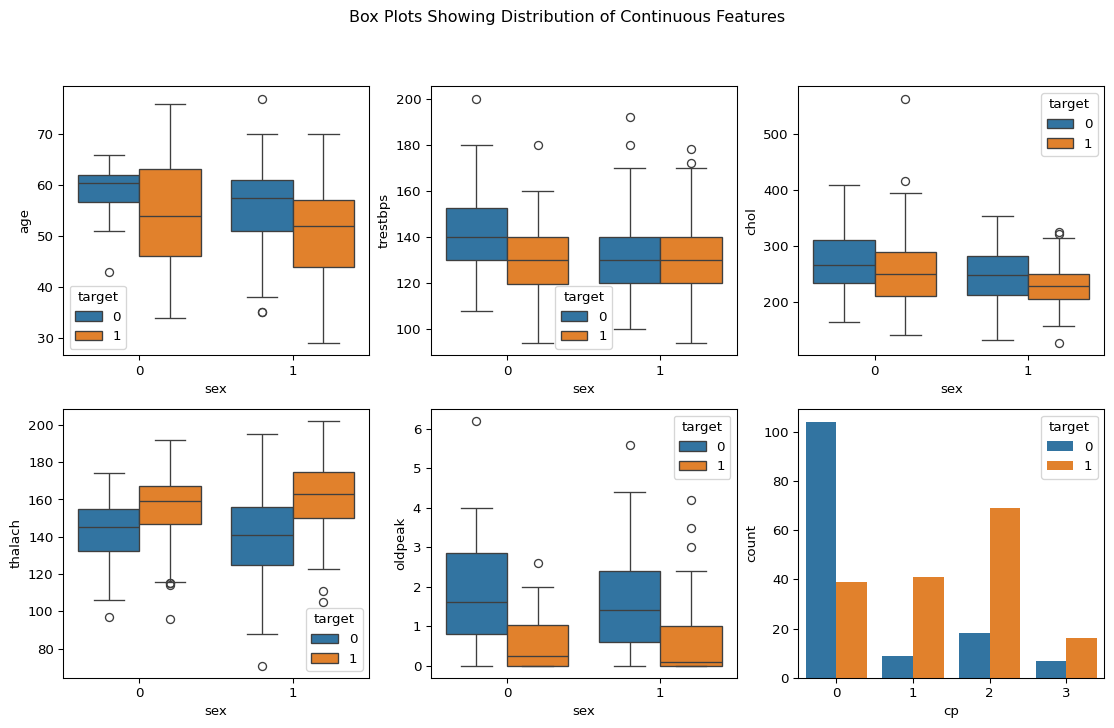

In [ ]:
#  Obtain boxplot for continuous features
# Prepare a subplot with rows = 2 and columns = 3
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8), dpi = 96, sharey = False)

# Box-Plot 'age' vs 'sex' with hue = 'target' in (0,0) axis
sns.boxplot(y = 'age', x = 'sex', hue = 'target', data = df, ax = axis[0, 0])

# Box-Plot 'age' vs 'trestbps' with hue = 'target' in (0,1) axis
sns.boxplot(y = 'trestbps', x = 'sex', hue = 'target', data = df, ax = axis[0, 1])

# Box-Plot 'age' vs 'chol' with hue = 'target' in (0,2) axis
sns.boxplot(y = 'chol', x = 'sex', hue = 'target', data = df, ax = axis[0, 2])

# Box-Plot 'age' vs 'thalach' with hue = 'target' in (1,0) axis
sns.boxplot(y = 'thalach', x = 'sex', hue = 'target', data = df, ax = axis[1, 0])

# Box-Plot 'age' vs 'oldpeak' with hue = 'target' in (1,1) axis
sns.boxplot(y = 'oldpeak', x = 'sex', hue = 'target', data = df, ax = axis[1, 1])

# Count-Plot of 'cp' with hue = 'target in (1,2) axis
sns.countplot(x = 'cp', hue = 'target', data = df, ax = axis[1, 2])
fig.suptitle('Box Plots Showing Distribution of Continuous Features')
plt.show()

Here we observe there are no significant outliers in the dataset. Also, we observe that the majority of the `cp` values are `0`.

Next, let's explore the correlation matrix for the entire dataset to see which features contribute higher towards a patient exhibiting probability of heart disease.

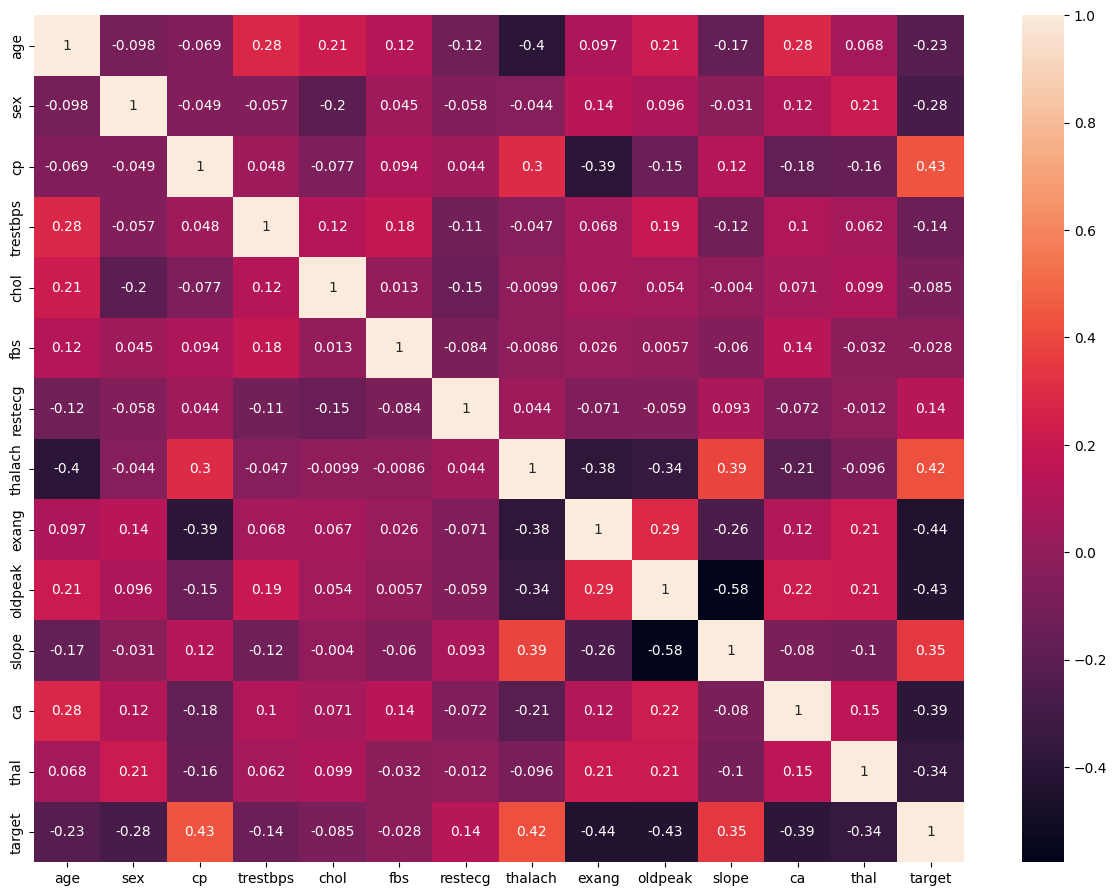

In [ ]:
#  Obtain the correlation heatmap

corr_df = df.corr()
plt.figure(figsize = (15, 11))
sns.heatmap(corr_df, annot = True)
plt.show()

Of the 13 features in the dataset features: `cp`, `thalach`, `slope` show highest positive correlation and the feaures: `exang`, `oldpeak`, `ca`, `thal` show highest negative correlation with `target`. Surprisingly, cholesterol (`chol`) does not exhibit a higher correlation value.

Before we proceed with the classifier design let's split the dataset into train-test sets.

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size = 0.3, random_state = 42, stratify = target_df)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (212, 13)
Shape of X_test: (91, 13)
Shape of y_train: (212,)
Shape of y_test: (91,)


Here, we got the dimension of train set of features dataset is `(212, 13)` and target dataset is `(212,)`. Dimension of test set of features dataset is `(91, 13)` and target dataset is `(91,)`.

---

#### Activity 3: Naive Bayes Classifier

Naive Bayes is a simple algorithm which falls under Supervised Learning technique. Why is it called Naive Bayes?

- **Naive:** It is called naive as it is based on a simple assumption that all the features of dataset are mutually independent.

- **Bayes:** It is based on **Bayes Theorem**.

<br>

Bayes theorem is based on **Conditional Probability** which states that something will happen, given that something else has already occurred. By using conditional probability, we can find out the probability of an event will occur given the knowledge of the previous event.

Calculating conditional probability is as simple as predicting the chances of Lionel Messi scoring a goal based on his form (goals scored in recent matches) and opponent team.

<br>

Mathematically Bayes' theorem can be expressed as:

\begin{align}
P(A|B) = \frac{P(B|A).P(A)}{P(B)}
\end{align}

Where,

- $P(A|B)$ is **Posterior probability** i.e. probability of event A given value of event B.

- $P(B|A)$ is **Likelihood** of event B given event A is true.

- $P(A)$ is **Prior probability**, probability of event A.

- $P(B)$ is **Marginal probability** or **Evidence**, probability of event B.

<br>


💡 Don't worry if it feels a bit complicated, we will explore each of these terms along with `GaussianNB` classifier with sufficient details using simple examples in the next lesson.

<br>

---

<br>

For now, let us focus on building a classifier using the `sklearn` module for the given problem statement. To construct a classifier using Naive Bayes:

1. Import the required library which contains methods and attributes to design a Naive Bayes classifier.

  ```python
  from sklearn.naive_bayes import GuassianNB
  ```
2. Create an object (say `nb_clf`) of the `GaussianNB()` constructor.

4. Call the `fit()` function on the above constructor with train features and target variables as inputs.

5. Get the predicted target values for both train and test sets by calling the `predict()` function on `nb_clf`.

6. Get the accuracy score on both train and test sets by calling the `score()` function on the classifier object.




In [ ]:
#  Create Naive Bayes Classifier

# Import the required library
from sklearn.naive_bayes import GaussianNB

# Modeling the NB classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Predicting the train and test sets
y_train_predict_nb = nb_clf.predict(X_train)
y_test_predict_nb = nb_clf.predict(X_test)

# Evaluating accuracy scores
print('Accuracy on the training set: {:.2f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy on the test set: {:.2f}'.format(nb_clf.score(X_test, y_test)))

Accuracy on the training set: 0.86
Accuracy on the test set: 0.79


The accuracy scores seems promising. Let us also plot a confusion matrix and print classification report for the test set.

In [ ]:
#  Obtain the confusion matrix for the classifier
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_test_predict_nb))
print(classification_report(y_test, y_test_predict_nb))

[[29 12]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.75        41
           1       0.78      0.86      0.82        50

    accuracy                           0.79        91
   macro avg       0.79      0.78      0.79        91
weighted avg       0.79      0.79      0.79        91



The accuracy scores, precision, recall and f1-score seems promising for the test dataset with a total of only $12 + 7 = 19$ misclassified cases.

Next let us build a logistic regression based classifier to set a benchmark for performance.

---

In [ ]:
df["cp"].nunique()

4

In [ ]:
df["cp"].unique()

array([3, 2, 1, 0])

In [ ]:
df["cp"].value_counts()

,count
cp,
0,143
2,87
1,50
3,23


#### Activity 4: Logistic Regression

Before we proceed with classifier design, let's normalise the dataset. Before that, let us obtain a list of features that contain only two unique values i.e. `0` and `1`.

In [ ]:
#Obtain a list of discrete features
discrete_features = []
for feature in features_df.columns:
  if features_df[feature].nunique() < 3:
    discrete_features.append(feature)

print("Discrete Features:", discrete_features)
print('Count of Discrete features:', len(discrete_features))

Discrete Features: ['sex', 'fbs', 'exang']
Count of Discrete features: 3


Hence, 3 discrete features contains only two unique values `0` and `1`. We will  use `StandardScaler` to scale all the feature variables excluding these 3 discrete features as their values already lie in the range `[0, 1]`.



In [ ]:
# Normalise the feature values.
from sklearn.preprocessing import StandardScaler

continuous_features = features_df.drop(discrete_features, axis = 1)

standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(continuous_features)
X_cont_scaled = pd.DataFrame(scaled_features)
X_cont_scaled.columns = continuous_features.columns
X_cont_scaled.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,0.952197,1.973123,0.763956,-0.256334,-1.005832,0.015443,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,1.002577,-0.092738,0.072199,0.898962,1.633471,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,0.032031,-0.092738,-0.816773,-1.005832,0.977514,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.032031,-0.663867,-0.198357,0.898962,1.239897,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-0.938515,-0.663867,2.082050,0.898962,0.583939,-0.379244,0.976352,-0.714429,-0.512922


In [ ]:
X_cont_scaled["cp"].unique()

array([ 1.97312292,  1.00257707,  0.03203122, -0.93851463])

Now that we have scaled all the feature variables having either continuous values or more than 2 unique values, let us concatenate the scaled continuous features with the discrete features using `pd.concat()` function.



In [ ]:
#  Contenate the scaled continuous features  with discrete features.
X_scaled = pd.concat([X_cont_scaled, features_df[discrete_features]], axis = 1)
X_scaled

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal,sex,fbs,exang
0,0.952197,1.973123,0.763956,-0.256334,-1.005832,0.015443,1.087338,-2.274579,-0.714429,-2.148873,1,1,0
1,-1.915313,1.002577,-0.092738,0.072199,0.898962,1.633471,2.122573,-2.274579,-0.714429,-0.512922,1,0,0
2,-1.474158,0.032031,-0.092738,-0.816773,-1.005832,0.977514,0.310912,0.976352,-0.714429,-0.512922,0,0,0
3,0.180175,0.032031,-0.663867,-0.198357,0.898962,1.239897,-0.206705,0.976352,-0.714429,-0.512922,1,0,0
4,0.290464,-0.938515,-0.663867,2.082050,0.898962,0.583939,-0.379244,0.976352,-0.714429,-0.512922,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-0.938515,0.478391,-0.101730,0.898962,-1.165281,-0.724323,-0.649113,-0.714429,1.123029,0,0,1
299,-1.033002,1.973123,-1.234996,0.342756,0.898962,-0.771706,0.138373,-0.649113,-0.714429,1.123029,1,0,0
300,1.503641,-0.938515,0.706843,-1.029353,0.898962,-0.378132,2.036303,-0.649113,1.244593,1.123029,1,1,0
301,0.290464,-0.938515,-0.092738,-2.227533,0.898962,-1.515125,0.138373,-0.649113,0.265082,1.123029,1,0,1


Hence, we have obtained the final scaled DataFrame containing the feature variables. Let us again perform train-test split on the scaled feature DataFrame and target DataFrame.

In [ ]:
#  Split dataset into training set and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, target_df, test_size = 0.3, random_state = 42, stratify = target_df)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train2.shape)
print("Shape of X_test:", X_test2.shape)
print("Shape of y_train:", y_train2.shape)
print("Shape of y_test:", y_test2.shape)

Shape of X_train: (212, 13)
Shape of X_test: (91, 13)
Shape of y_train: (212,)
Shape of y_test: (91,)


To construct a classifier using logistic regression:

1. Import the required library which contains methods and attributes to design the classifier.

  ```python
from sklearn.linear_model import LogisticRegression
  ```
2. Create an object (say `lg_clf`) of the `LogisticRegression()` constructor and set `max_iter = 1000`.

4. Call the `fit()` function on the above constructor with train features and target variables as inputs.

5. Get the predicted target values for both train and test sets by calling the `predict()` function on `lg_clf`.

6. Get the accuracy score on both train and test sets by calling the `score()` function on the classifier object.

In [ ]:
# Create a multivariate logistic regression model. Also, predict the target values for the train set.

from sklearn.linear_model import LogisticRegression

# Modeling the Logistic Regression Classifier
lg_clf = LogisticRegression(max_iter = 1000)
lg_clf.fit(X_train2, y_train2)

# Predicting the train and test sets
y_train_predict_lg = lg_clf.predict(X_train2)
y_test_predict_lg = lg_clf.predict(X_test2)

# Evaluating accuracy scores
print('Accuracy on the training set: {:.2f}'.format(lg_clf.score(X_train2, y_train2)))
print('Accuracy on the test set: {:.2f}'.format(lg_clf.score(X_test2, y_test2)))

Accuracy on the training set: 0.88
Accuracy on the test set: 0.76


The accuracy scores seems promising. Let's also plot a confusion matrix and print classification report for the test set.

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        41
           1       0.76      0.82      0.79        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91



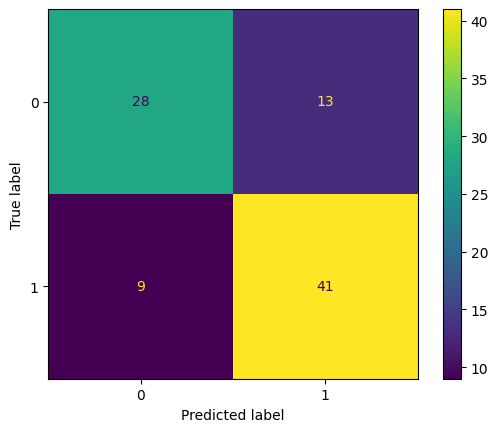

In [ ]:
#  Obtain the Confusion Matrix and classification report.
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_estimator(lg_clf, X_test2, y_test2, values_format='d')
print(classification_report(y_test2, y_test_predict_lg))

The accuracy scores, precision, recall and f1-score seems promising for the test dataset. However, we have a total of $13 + 9 = 22$ misclassified cases which is greater than **N**aive **B**ayes (NB) classifier.

Next let us build kNN classifier to further compare the classifier performance.

---

#### Activity 5: kNN Classifier

For kNN classifier, let's find a value of $k$ which can give a good train and test set accuracy. For this, we can determine the accuracy scores for neighbours from `1` to `20` and plot these scores using the steps given below:

1. Import the required library:

  ```python
from sklearn.neighbors import KNeighborsClassifier
  ```

2. Create two lists `acc_train` and `acc_test` to store the accuracy scores of train set and test set for various $k$ values.

3. Initiate a `for` loop that ranges from `1` to `21` with the current iterator stored in variable `k`. Inside this `for` loop:

  - Create an object of `KNeighborsClassifier` class with `n_neighbors = k` as input.

  - Call the `fit()` function using the object of  `KNeighborsClassifier` class and pass train set as inputs to this function.

  - Determine the train set and test set accuracy scores for current `k` value and append these scores to the `acc_train` and `acc_test` lists respectively.

4. Visualise the  values of `acc_train` and `acc_test` lists using line plots.

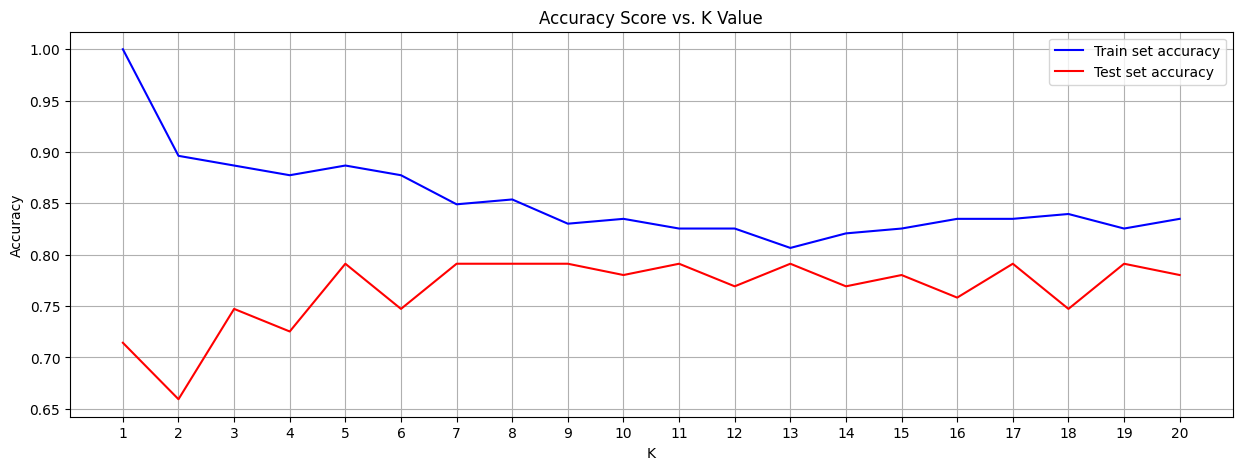

In [ ]:
#Plot accuracy scores of train and test sets for 1 to 20 neighbours.

from sklearn.neighbors import KNeighborsClassifier

# Define the empty lists
acc_train = []
acc_test= []

# Modeling the kNN classifier for k neighbors
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train2, y_train2)
    acc_train.append(knn.score(X_train2, y_train2))
    acc_test.append(knn.score(X_test2, y_test2))

# Plotting the accuracy scores
plt.figure(figsize = (15, 5))
plt.grid()
plt.xticks(range(1, 21, 1))
plt.plot(range(1, 21), acc_train, color= 'blue', label = "Train set accuracy")
plt.plot(range(1, 21), acc_test, color= 'red', label = "Test set accuracy")
plt.title('Accuracy Score vs. K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

You may observe that with an increase in the number of neighbours, train set accuracy decreases whereas test set accuracy increases. As test set accuracy is a better estimate than train set accuracy for unseen data, we can say that $13$ is an optimal value for $k$. As beyond $k = 13$ the test set accuracy also starts to decrease.

Let us now deploy the kNN classifier model for $k = 13$ and evaluate the performance of this model.

In [ ]:
# Modeling the kNN classifier

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train2, y_train2)

# Predicting the train and test sets
y_train_predict_knn = knn.predict(X_train2)
y_test_predict_knn = knn.predict(X_test2)

# Evaluating accuracy scores
print('Accuracy on the training set: {:.2f}'.format(knn.score(X_train2, y_train2)))
print('Accuracy on the test set: {:.2f}'.format(knn.score(X_test2, y_test2)))

Accuracy on the training set: 0.81
Accuracy on the test set: 0.79


The accuracy scores seems to be the best among all the classifiers. Let's plot the confusion matrix for the test set.

              precision    recall  f1-score   support

           0       0.84      0.66      0.74        41
           1       0.76      0.90      0.83        50

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



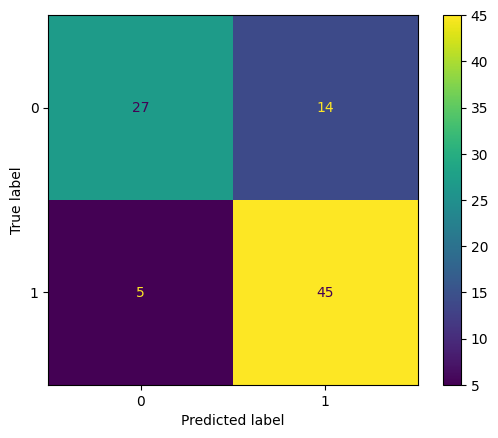

In [ ]:
#  Obtain the Confusion Matrix for the Classifier

ConfusionMatrixDisplay.from_estimator(knn, X_test2, y_test2, values_format = 'd')
print(classification_report(y_test2, y_test_predict_knn))

In [ ]:
# Modeling the kNN classifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train2, y_train2)

# Predicting the train and test sets
y_train_predict_knn = knn.predict(X_train2)
y_test_predict_knn = knn.predict(X_test2)

# Evaluating accuracy scores
print('Accuracy on the training set: {:.2f}'.format(knn.score(X_train2, y_train2)))
print('Accuracy on the test set: {:.2f}'.format(knn.score(X_test2, y_test2)))

Accuracy on the training set: 0.89
Accuracy on the test set: 0.79


              precision    recall  f1-score   support

           0       0.82      0.68      0.75        41
           1       0.77      0.88      0.82        50

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



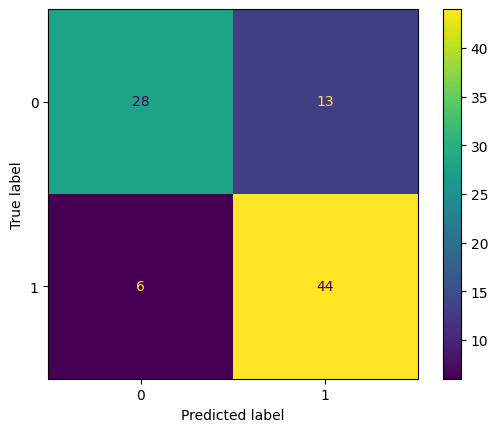

In [ ]:

ConfusionMatrixDisplay.from_estimator(knn, X_test2, y_test2, values_format = 'd')
print(classification_report(y_test2, y_test_predict_knn))

The accuracy scores, precision, recall and f1-score are best with only a total of $14 + 5 = 19$ misclassified cases.

To further analyse the classifier performance let's obtain the AUC score and plot the ROC curves for the classifiers.

---

####Activity 6: Model Evaluation - ROC Curve

Let's obtain the AUC score and plot the ROC curve for the classifiers. For this:

1. Import the required library:

  `from sklearn.metrics import roc_auc_score`

2. Obtain the AUC scores for all the three classifiers by calling the `roc_auc_score()` function and passing test target variable and its predicted value as inputs.

In [ ]:
#  Obtain the AUC Scores for the Classifiers
# Import 'roc_auc_score' from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Predict the score of test sets using 'roc_auc_score' for NB Classifier
roc_nb = roc_auc_score(y_test2, y_test_predict_nb)
print('AUC Score for Naive Bayes Classifier: {:.2f} %'.format(roc_nb))

# Predict the score of test sets using 'roc_auc_score' for Logistic Regression Classifier
roc_lg = roc_auc_score(y_test2, y_test_predict_lg)
print('AUC Score for Logistic Regression Classifier: {:.2f} %'.format(roc_lg))

 # Predict the score of test sets using 'roc_auc_score' for kNN Classifier
roc_knn = roc_auc_score(y_test2, y_test_predict_knn)
print('AUC Score for kNN Classifier: {:.2f} %'.format(roc_knn))

AUC Score for Naive Bayes Classifier: 0.78 %
AUC Score for Logistic Regression Classifier: 0.75 %
AUC Score for kNN Classifier: 0.78 %


Both kNN  and Naive Bayes classifier exhibits same highest AUC score followed by Logistic Regression classifier.

<br>

Next plot the ROC curve for the classifiers using the steps given below:

1. Import the required library:

  `from sklearn.metrics import roc_curve`

2. Unpack the `fpr`, `tpr`, and `threshold` values for the classifiers using `roc_curve()` function.

3. For baseline $y = x$, Set `x = [0, 1], y = [0, 1]`, `linestyle = '--'`, and `label = 'Baseline'`

4. Plot the ROC curves for all the  classifiers and set different colors for them to have a good readability.

5. Provide the relevant title to the plot; label the x, y axes; and insert legends to the graphs.

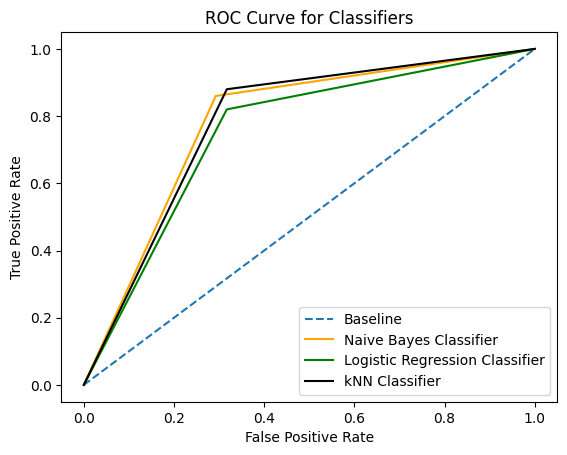

In [ ]:
# Plot the ROC curve for the classifiers
# Import 'roc_curve' from sklearn.metrics
from sklearn.metrics import roc_curve

# Obtain 'fpr', 'tpr' and threshold values for NB Classifier using 'roc_curve' function
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test2, y_test_predict_nb)

# Obtain 'fpr', 'tpr' and threshold values for Logistic Regression Classifier using 'roc_curve' function
fpr_lg, tpr_lg, threshold_lg = roc_curve(y_test2, y_test_predict_lg)

# Obtain 'fpr', 'tpr' and threshold values for kNN Classifier using 'roc_curve' function
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test2, y_test_predict_knn)

# Plot roc curves along with a baseline
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Baseline')
plt.plot(fpr_nb, tpr_nb, color = 'orange', label = 'Naive Bayes Classifier')
plt.plot(fpr_lg, tpr_lg, color = 'green', label = 'Logistic Regression Classifier')
plt.plot(fpr_knn, tpr_knn, color = 'black', label = 'kNN Classifier')

plt.title('ROC Curve for Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

From the ROC curve and confusion matrix we can observe that the kNN classifier exhibits best result (as it has highest `tpr`) followed by Naive Bayes classifier and lastly the Logistic Regression classifier.

Key points to remember💭

1. However, with kNN classifier the computing time is high as we need to obtain the optimal value of $k$ neighbours for which the classifier exhibits the best performance.

2. The data normalisation is almost a mandatory process for most of the classifiers, however for the Naive Bayes classifier we didn't normalise the dataset as for `GaussianNB` the data normalisation is an internal process.

<br>

Let's stop here. In the next class, we will understand the working of Naive Bayes classifier with a relatively simple example and explore the underlying mathematics behind the Bayes theorem.